In [10]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose #Splitting the time series into components
from sklearn.metrics import mean_squared_error  #calculating RMSE
from math import sqrt

In [11]:
df= pd.read_csv('Gemini_BTCUSD_1h.csv')

In [12]:
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1.692570e+12,20-08-2023 23:00,BTC/USD,26210.24,26210.26,26154.33,26187.84,11.409621,298793.32210
1,1.692570e+12,20-08-2023 22:00,BTC/USD,26186.93,26229.40,26185.83,26210.24,4.107410,107656.20820
2,1.692570e+12,20-08-2023 21:00,BTC/USD,26232.97,26244.73,26158.38,26186.93,2.790396,73071.90289
3,1.692560e+12,20-08-2023 20:00,BTC/USD,26142.63,26288.00,26142.63,26232.97,1.673166,43892.11348
4,1.692560e+12,20-08-2023 19:00,BTC/USD,26118.02,26147.36,26114.27,26142.63,5.536223,144731.43110


In [ ]:
df=df.iloc[::-1]

<Axes: >

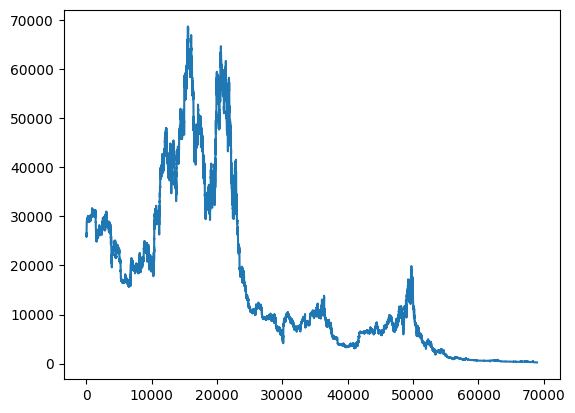

In [6]:
df.close.plot() #plotting your timeseries

In [14]:
df.shape

(68960, 9)

In [39]:
df_train = df.iloc[:40000] #splitting dataset, 12yrs to create model
df_test = df.iloc[40000:]  #2 years data is used to test the model

#we're manually splitting the dataset because we don't want to change the sequence
#we're consideering last2years data as testing data and the 12 years data as training data.


In [40]:
df_train.shape


(40000, 9)

In [41]:
df_test.shape

(28960, 9)

<Axes: >

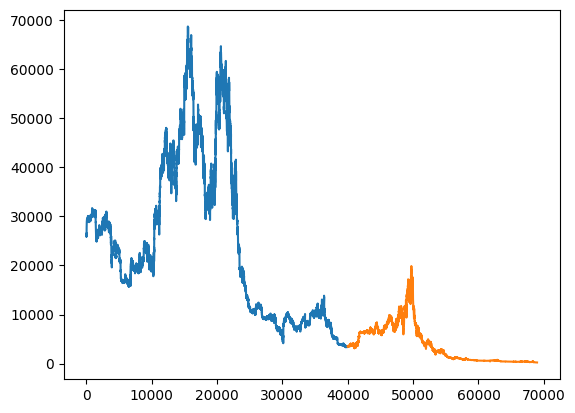

In [42]:
df_train.close.plot()
df_test.close.plot()

In [43]:
res = statsmodels.tsa.seasonal.seasonal_decompose(df.close,period=12)

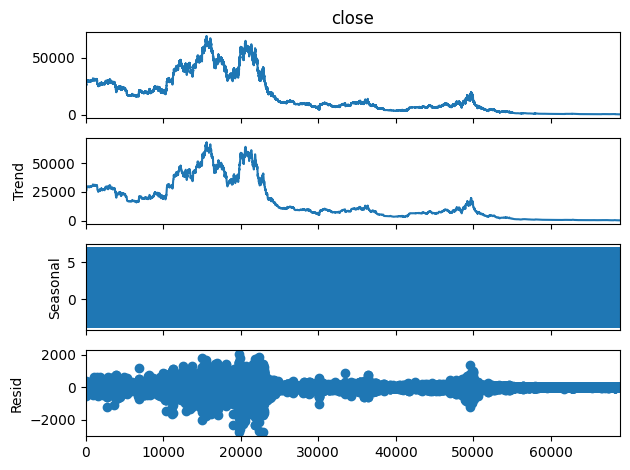

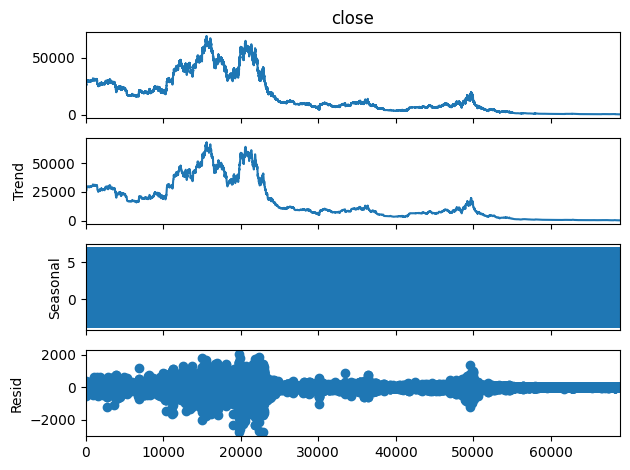

In [44]:
res.plot() #to view the components of time series.

#the first graph is the actual data graph
#2nd graph is the trend
#3rd is seasonal
#4th is residual

NAIVE METHOD:

If you want to predict what will happen in the next two years that will be same as last month.

If you want to predict what will happen in the next years that will be same as last time period.

the trend for the next two years will be same as the last month.

In [45]:
df_train.tail()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
39995,1.548580e+12,27-01-2019 09:00,BTC/USD,3552.52,3552.52,3534.81,3540.80,7.420508,26274.53505
39996,1.548580e+12,27-01-2019 08:00,BTC/USD,3549.37,3555.82,3549.36,3552.52,8.109585,28809.46417
39997,1.548570e+12,27-01-2019 07:00,BTC/USD,3550.00,3550.00,3540.77,3549.37,5.538490,19658.15170
39998,1.548570e+12,27-01-2019 06:00,BTC/USD,3550.02,3552.05,3550.00,3550.00,9.146862,32471.36150
39999,1.548570e+12,27-01-2019 05:00,BTC/USD,3550.87,3551.88,3548.19,3550.02,28.232632,100226.40830


In [46]:
dd = np.asarray(df_train.close) #saved as array

In [47]:
y_hat = df_test.copy()   #copied the test data

In [48]:
y_hat['naive'] =  dd[len(dd)-1] #adding forecasted column as naive because the technique used is NAIVE method.

In [49]:
y_hat.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD,naive
40000,1.548560e+12,27-01-2019 04:00,BTC/USD,3562.47,3562.67,3550.86,3550.87,3.378733,11997.44026,3550.02
40001,1.548560e+12,27-01-2019 03:00,BTC/USD,3561.00,3563.54,3558.72,3562.47,4.680409,16673.81748,3550.02
40002,1.548550e+12,27-01-2019 02:00,BTC/USD,3556.03,3561.00,3556.03,3561.00,4.052531,14431.06382,3550.02
40003,1.548550e+12,27-01-2019 01:00,BTC/USD,3559.00,3559.01,3548.65,3556.03,29.118059,103544.69140,3550.02
40004,1.548550e+12,27-01-2019 00:00,BTC/USD,3558.19,3559.05,3525.58,3559.00,69.765781,248296.41600,3550.02


In [50]:
y_hat.tail()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD,naive
68955,1.444324e+09,08-10-2015 17:00,BTC/USD,244.25,244.99,244.02,244.99,3.920632,960.515634,3550.02
68956,1.444320e+09,08-10-2015 16:00,BTC/USD,244.92,244.92,244.25,244.25,3.895252,951.415413,3550.02
68957,1.444316e+09,08-10-2015 15:00,BTC/USD,245.00,245.00,244.92,244.92,3.016926,738.905474,3550.02
68958,1.444313e+09,08-10-2015 14:00,BTC/USD,245.00,245.00,244.50,245.00,4.453649,1091.143988,3550.02
68959,1.444309e+09,08-10-2015 13:00,BTC/USD,0.00,245.00,0.00,245.00,0.606654,148.630323,3550.02


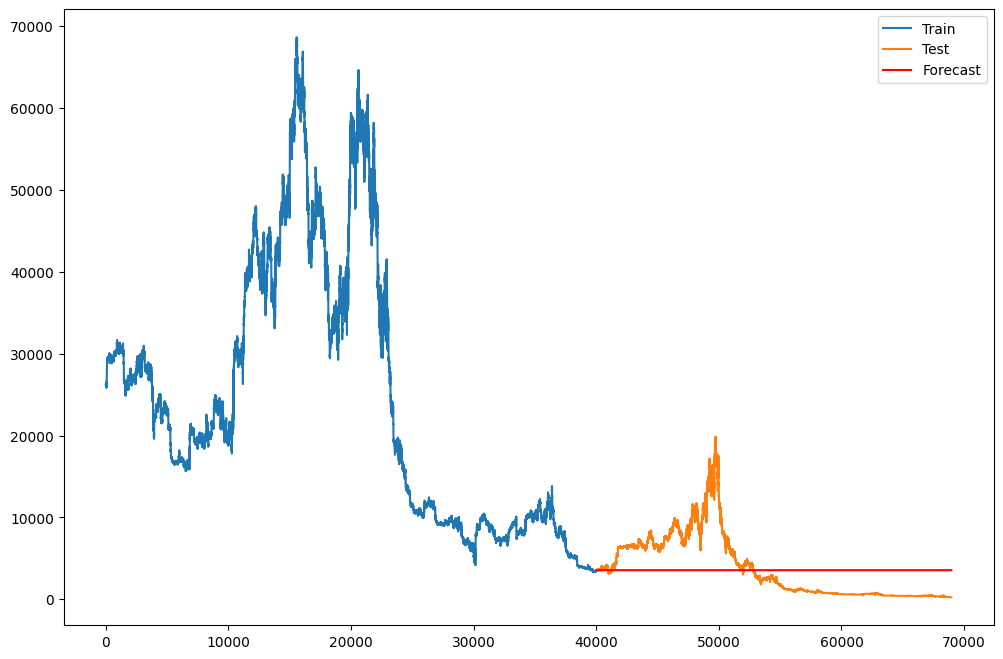

In [51]:
plt.figure(figsize=(12,8))
plt.plot(df_train.index,df_train.close,label='Train')
plt.plot(df_test.index,y_hat.close,label='Test')
plt.plot(y_hat.index,y_hat.naive,label='Forecast',c='r')
plt.legend()

#red line is forecasted value, technique of forecasting weused here is the NAIVE technique.

In [53]:
rms = sqrt(mean_squared_error(df_test.close, y_hat.naive))
rms

3844.9700928450507

SIMPLE AVERAGE METHOD:

the avg of total 144 months (12 years) values will continue for the next two years.

the avg of the input values will continue for the next time period to be predicted.

In [54]:
y_hat_avg = df_test.copy()

In [55]:
y_hat_avg['MeanForecast'] = df_train['close'].mean()

In [56]:
y_hat_avg.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD,MeanForecast
40000,1.548560e+12,27-01-2019 04:00,BTC/USD,3562.47,3562.67,3550.86,3550.87,3.378733,11997.44026,24210.784611
40001,1.548560e+12,27-01-2019 03:00,BTC/USD,3561.00,3563.54,3558.72,3562.47,4.680409,16673.81748,24210.784611
40002,1.548550e+12,27-01-2019 02:00,BTC/USD,3556.03,3561.00,3556.03,3561.00,4.052531,14431.06382,24210.784611
40003,1.548550e+12,27-01-2019 01:00,BTC/USD,3559.00,3559.01,3548.65,3556.03,29.118059,103544.69140,24210.784611
40004,1.548550e+12,27-01-2019 00:00,BTC/USD,3558.19,3559.05,3525.58,3559.00,69.765781,248296.41600,24210.784611


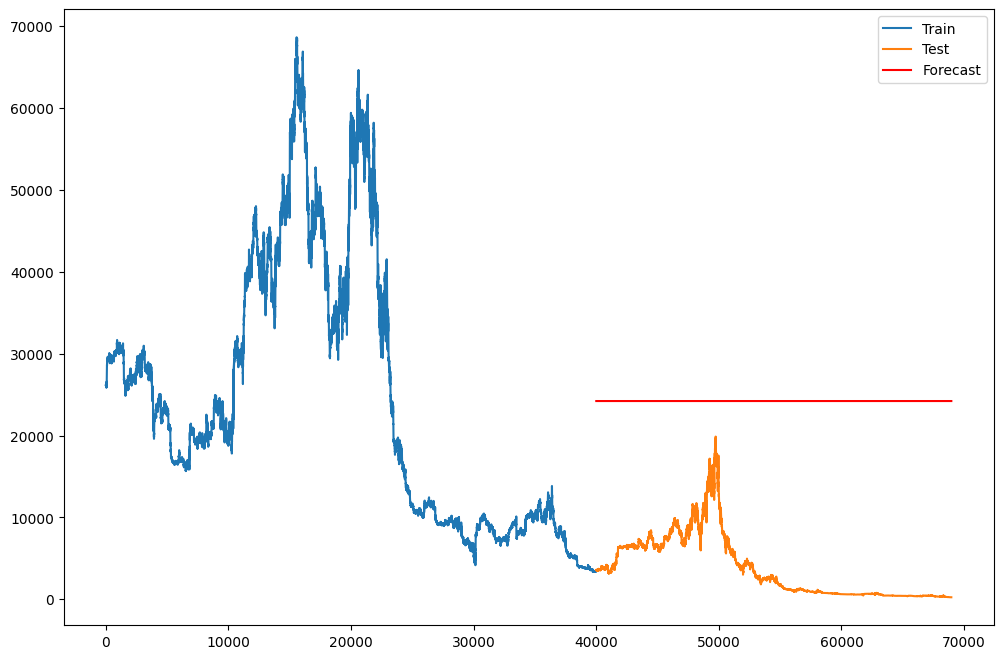

In [57]:
plt.figure(figsize=(12,8))
plt.plot(df_train.index,df_train.close,label='Train')
plt.plot(df_test.index,y_hat.close,label='Test')
plt.plot(y_hat_avg.index,y_hat_avg.MeanForecast,label='Forecast',c='r')
plt.legend()

#forecast here is the predicted values.
#meanforecast is the mean of all the forecast values.

In [59]:
rms = sqrt(mean_squared_error(df_test.close, y_hat_avg.MeanForecast))
rms

20815.29972736448

3) MOVING AVERAGE:

eg: 3 MONTH moving avg = avg of previous 3 months 3 month movig avg of 7th month = avg of 4th,5th,6th months

the time period choosing will depend on the RMSE value.

if rmse of 12 months> rmse of 6months then, 6 month moving avg is considered.

In [60]:
y_hat_avg['MovAvgForecast'] = df_train['close'].rolling(12).mean().iloc[-1]

#12 IN rolling is 12 month moving avg.
#here the avg is the avg of 12 months of the 12 th year, because were predicting 13th and 14th year

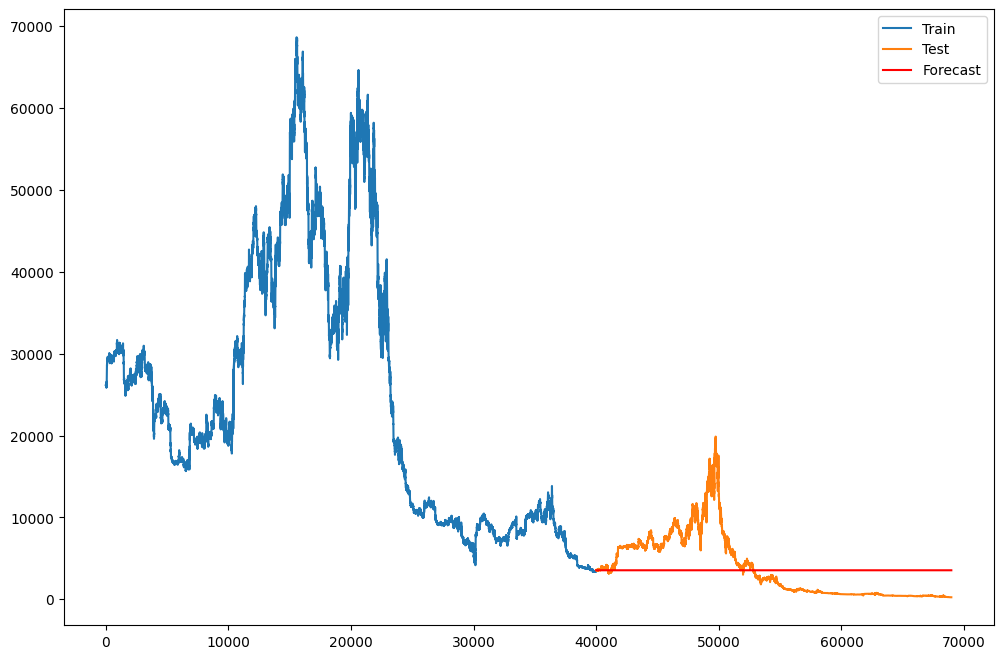

In [61]:
plt.figure(figsize=(12,8))
plt.plot(df_train.index,df_train.close,label='Train')
plt.plot(df_test.index,df_test.close,label='Test')
plt.plot(y_hat_avg.index,y_hat_avg.MovAvgForecast,label='Forecast',c='r')
plt.legend()

#this is wrong graph here, the y_hat_avg is updated one after holtwinters method.

In [62]:
y_hat_avg

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD,MeanForecast,MovAvgForecast
40000,1.548560e+12,27-01-2019 04:00,BTC/USD,3562.47,3562.67,3550.86,3550.87,3.378733,11997.440260,24210.784611,3541.341667
40001,1.548560e+12,27-01-2019 03:00,BTC/USD,3561.00,3563.54,3558.72,3562.47,4.680409,16673.817480,24210.784611,3541.341667
40002,1.548550e+12,27-01-2019 02:00,BTC/USD,3556.03,3561.00,3556.03,3561.00,4.052531,14431.063820,24210.784611,3541.341667
40003,1.548550e+12,27-01-2019 01:00,BTC/USD,3559.00,3559.01,3548.65,3556.03,29.118059,103544.691400,24210.784611,3541.341667
40004,1.548550e+12,27-01-2019 00:00,BTC/USD,3558.19,3559.05,3525.58,3559.00,69.765781,248296.416000,24210.784611,3541.341667
...,...,...,...,...,...,...,...,...,...,...,...
68955,1.444324e+09,08-10-2015 17:00,BTC/USD,244.25,244.99,244.02,244.99,3.920632,960.515634,24210.784611,3541.341667
68956,1.444320e+09,08-10-2015 16:00,BTC/USD,244.92,244.92,244.25,244.25,3.895252,951.415413,24210.784611,3541.341667
68957,1.444316e+09,08-10-2015 15:00,BTC/USD,245.00,245.00,244.92,244.92,3.016926,738.905474,24210.784611,3541.341667
68958,1.444313e+09,08-10-2015 14:00,BTC/USD,245.00,245.00,244.50,245.00,4.453649,1091.143988,24210.784611,3541.341667


In [63]:
rms = sqrt(mean_squared_error(df_test.close, y_hat_avg.MovAvgForecast))
rms

3845.4372778537627

WEIGHTED MOVING AVERAGE:

here, the latest number has the highest weightage, the earlier number will have the least weightage.

1st month will get the least weightage, 12th month have the highest weightage.

we can manually set the weighted avg for different months.

In [64]:
x = df_train['close'].iloc[-12:]

#extracting last 12 months values

In [65]:
wt_sum = 0
denom = 0
for ctr in range(len(x)):
  wt_sum = wt_sum + x.iloc[ctr]*(ctr+1)
  denom = denom +ctr+1

wt_avg = wt_sum/denom

In [66]:
wt_avg

3543.64782051282

In [67]:
y_hat_avg['WtMovAvgForecast'] = wt_avg

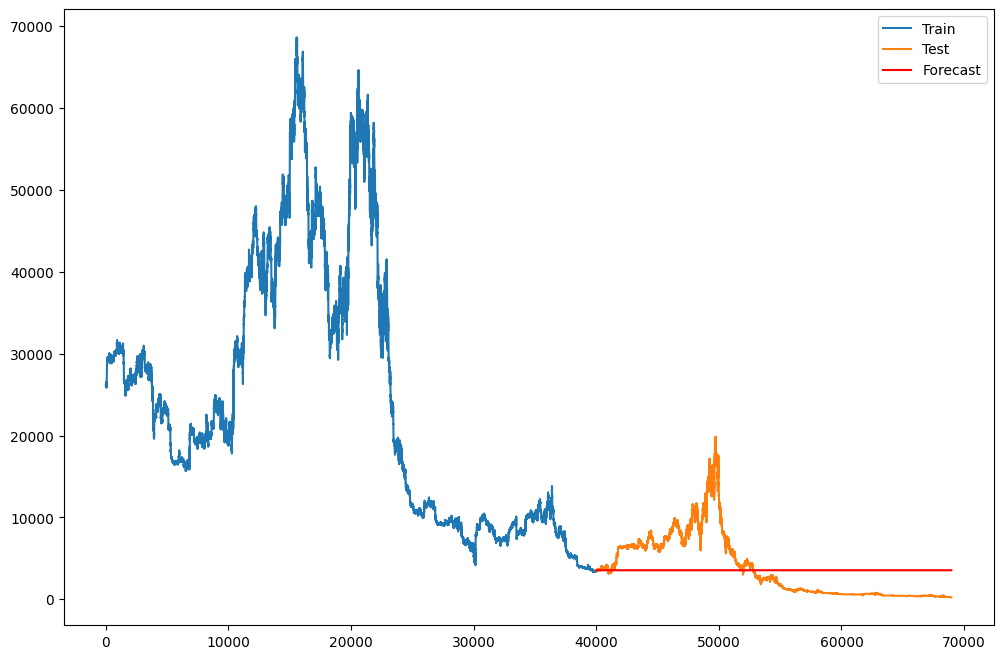

In [68]:
plt.figure(figsize=(12,8))
plt.plot(df_train.index,df_train.close,label='Train')
plt.plot(df_test.index,y_hat.close,label='Test') #here the correct command is df_test.BirthRate
plt.plot(y_hat_avg.index,y_hat_avg.WtMovAvgForecast,label='Forecast',c='r')
plt.legend()

In [69]:
rms = sqrt(mean_squared_error(df_test.close, y_hat_avg.WtMovAvgForecast))
rms

3845.3112242736706

In [70]:
y_hat_avg

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD,MeanForecast,MovAvgForecast,WtMovAvgForecast
40000,1.548560e+12,27-01-2019 04:00,BTC/USD,3562.47,3562.67,3550.86,3550.87,3.378733,11997.440260,24210.784611,3541.341667,3543.647821
40001,1.548560e+12,27-01-2019 03:00,BTC/USD,3561.00,3563.54,3558.72,3562.47,4.680409,16673.817480,24210.784611,3541.341667,3543.647821
40002,1.548550e+12,27-01-2019 02:00,BTC/USD,3556.03,3561.00,3556.03,3561.00,4.052531,14431.063820,24210.784611,3541.341667,3543.647821
40003,1.548550e+12,27-01-2019 01:00,BTC/USD,3559.00,3559.01,3548.65,3556.03,29.118059,103544.691400,24210.784611,3541.341667,3543.647821
40004,1.548550e+12,27-01-2019 00:00,BTC/USD,3558.19,3559.05,3525.58,3559.00,69.765781,248296.416000,24210.784611,3541.341667,3543.647821
...,...,...,...,...,...,...,...,...,...,...,...,...
68955,1.444324e+09,08-10-2015 17:00,BTC/USD,244.25,244.99,244.02,244.99,3.920632,960.515634,24210.784611,3541.341667,3543.647821
68956,1.444320e+09,08-10-2015 16:00,BTC/USD,244.92,244.92,244.25,244.25,3.895252,951.415413,24210.784611,3541.341667,3543.647821
68957,1.444316e+09,08-10-2015 15:00,BTC/USD,245.00,245.00,244.92,244.92,3.016926,738.905474,24210.784611,3541.341667,3543.647821
68958,1.444313e+09,08-10-2015 14:00,BTC/USD,245.00,245.00,244.50,245.00,4.453649,1091.143988,24210.784611,3541.341667,3543.647821


EXONENTIAL SMOOTHING:

In [71]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

SIMPLE EXPONENTIAL SMOOTHING (SES):

In [72]:
mod1 = SimpleExpSmoothing(np.asarray(df_train.close)).fit(smoothing_level=0.8)

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [73]:
y_hat_avg['SES'] = mod1.forecast(len(df_test))

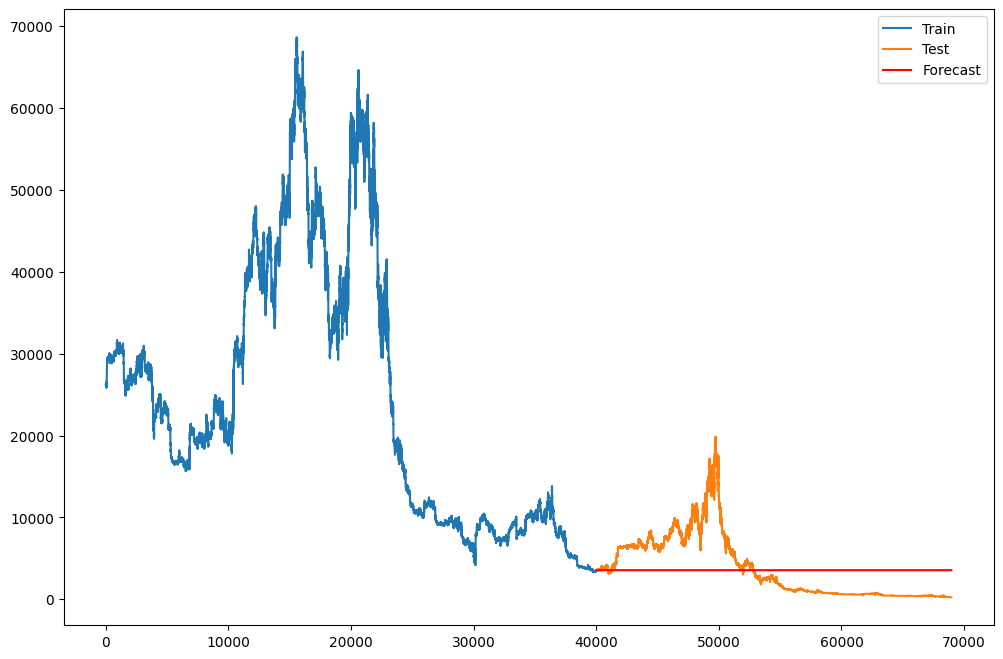

In [74]:
plt.figure(figsize=(12,8))
plt.plot(df_train.index,df_train.close,label='Train')
plt.plot(df_test.index,df_test.close,label='Test')
plt.plot(y_hat_avg.index,y_hat_avg.SES,label='Forecast',c='r')
plt.legend()

In [75]:
rms = sqrt(mean_squared_error(df_test.close, y_hat_avg.SES))
rms

3844.9714330319034

HOLD'S LINEAR TREND METHOD:

This is only based on the trend, not the seasonal component. Do not use this when seasonal variation is present. Here, we're just ignoring seasonal variation just for learning purpose.

In [76]:
mod2 = Holt(np.asarray(df_train.close)).fit(smoothing_level=0.6)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [77]:
y_hat_avg['HoltLinear'] = mod2.forecast(len(df_test))

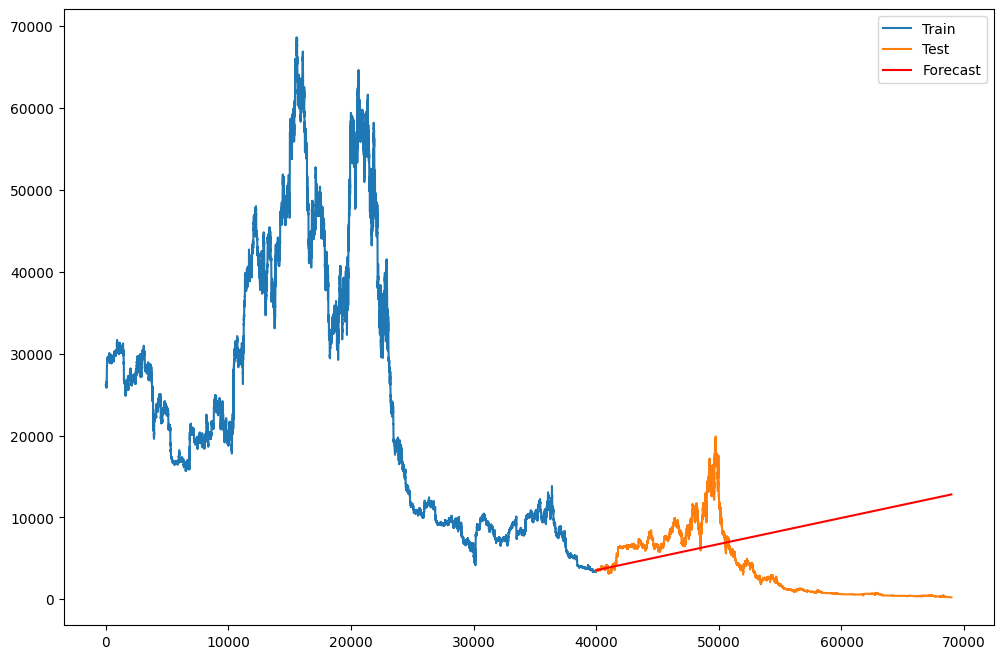

In [78]:
plt.figure(figsize=(12,8))
plt.plot(df_train.index,df_train.close,label='Train')
plt.plot(df_test.index,df_test.close,label='Test')
plt.plot(y_hat_avg.index,y_hat_avg.HoltLinear,label='Forecast',c='r')
plt.legend()

In [79]:
rms = sqrt(mean_squared_error(df_test.close, y_hat_avg.HoltLinear))
rms

7483.893968442952

HOLT-WINTER'S METHOD:

In [80]:
mod3 = ExponentialSmoothing(np.asarray(df_train.close),seasonal_periods = 12).fit()

In [81]:
y_hat_avg['HoltWinter'] = mod3.forecast(len(df_test))

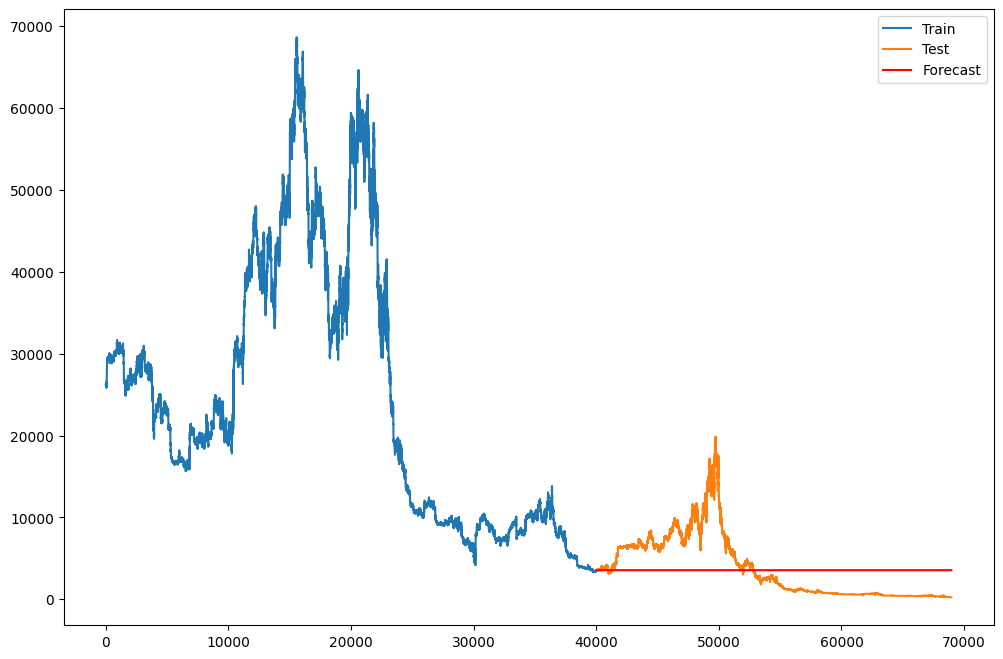

In [82]:
plt.figure(figsize=(12,8))
plt.plot(df_train.index,df_train.close,label='Train')
plt.plot(df_test.index,df_test.close,label='Test')
plt.plot(y_hat_avg.index,y_hat_avg.HoltWinter,label='Forecast',c='r')
plt.legend()

In [83]:
rms = sqrt(mean_squared_error(df_test.close, y_hat_avg.HoltWinter))
rms

3844.9700989256644

**AREMA**

In arema model, we are gong to have 3 numbers that have to be calculated.

in the sequence p,d,q is to be calculated

we need to figure out p,d,q before making predictions.

d= level of differencing.

**what is differencing?**

-> there is something called as stationary time series.

--> **in stationary time series, mean and std dev are constant.**

eg: rainfall every year is stationary time series.


**AREMA can be used only if the time series is stationary.**

Read your notes for clear understanding.

**AD FULLER TEST:**

--> AD Fuller test is used to check the stationarity of a time series.

--> H0: the time series is not stationary
--> HA : THE time series is stationary

In [84]:
from statsmodels.tsa.stattools import adfuller

In [86]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(close):
    result=adfuller(close)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [87]:
test_result=adfuller(df['close'])

In [88]:
adfuller_test(df['close'].diff().dropna())

ADF Test Statistic : -32.97421000192257
p-value : 0.0
#Lags Used : 61
Number of Observations Used : 68897
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


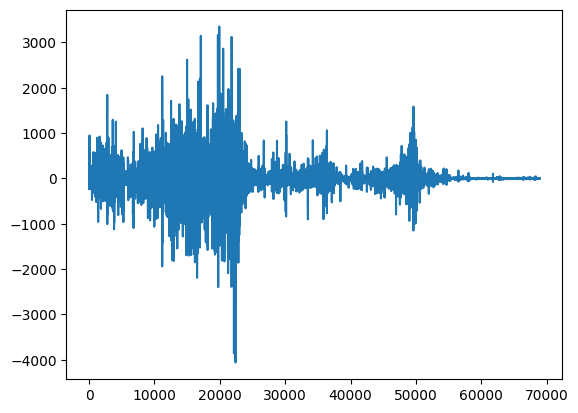

In [90]:
plt.plot(df['close'].diff())

ACF(Auto correlation factor) plot and PACF (Partial Auto corelation factor):

for finding p and q values, we use

**ACF(Auto correlation factor) plot for finding q**,

**PACF (Partial Auto corelation factor) for finding p**

In [91]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

ACF Plot:

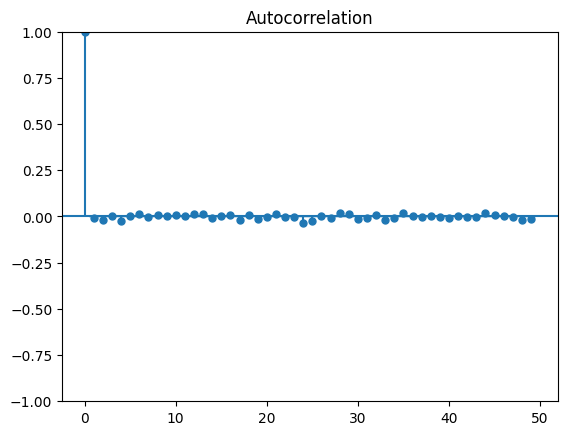

<Figure size 1200x800 with 0 Axes>

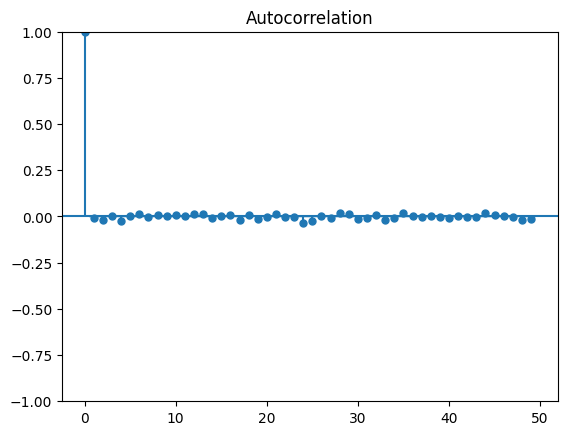

In [93]:
#finding ACF plot of df_train after 1st level of differencing,
# because our timeseries is becoming stationary after 1st differencing


plt.figure(figsize=(12,8))
plot_acf(df['close'].diff().dropna())

#here from the graph, q value =1

PACF Plot:

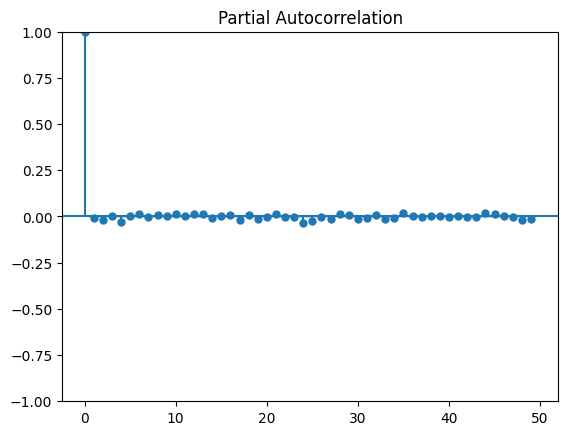

<Figure size 1200x800 with 0 Axes>

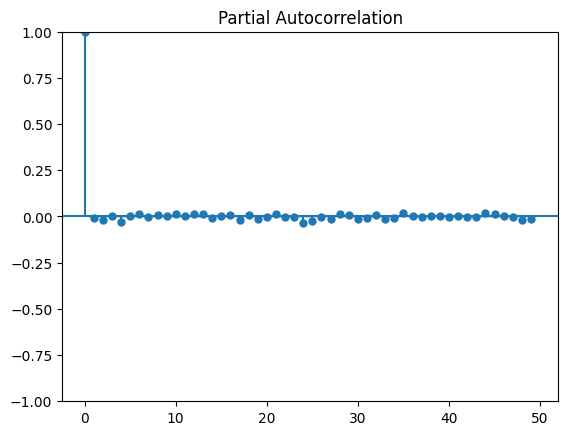

In [94]:
plt.figure(figsize=(12,8))
plot_pacf(df['close'].diff().dropna())

#from the PACF plot p = 1

ON the whole,

d =1,

p=1(from PACF graph ),

q = 2(From ACF graph)

In [95]:
from statsmodels.tsa.arima.model import ARIMA

In [97]:
mod4 = ARIMA(df['close'], order = (1,1,2)).fit()

# here order(p,d,q)

In [98]:
pred = mod4.forecast(len(df_test))

In [99]:
pred

68960    245.000732
68961    245.000283
68962    245.000345
68963    245.000336
68964    245.000337
            ...    
97915    245.000337
97916    245.000337
97917    245.000337
97918    245.000337
97919    245.000337
Name: predicted_mean, Length: 28960, dtype: float64

In [100]:
rms = sqrt(mean_squared_error(df_test.close, pred))
rms

5200.629868466362